In [2]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In [3]:
from sympy.physics.vector import *
N = ReferenceFrame('N')

### Solution to problem 7 of Dir/Grad Homework

Find the directional derivative of $f(x,y)=\sin(x+2y)$ at the point $(-2, -5)$ in the direction $\theta=3\pi/4$.

The directional derivative of $f$ at the point $(x,y)$ in the direction of the unit vector $\hat{u}$ is given by

$$D_{\hat{u}} f(x,y) = \nabla f(x,y) \cdot \hat{u}$$

For this problem

$$\nabla f(x,y) = \langle f_x(x,y), f_y(x,y) \rangle =
\langle \cos(x + 2y), 2\cos(x + 2y) \rangle$$

and, therefore

$$\nabla f(-2,-5) = \langle f_x(-2,-5), f_y(-2,-5) \rangle =
\langle \cos(-12), 2\cos(-12) \rangle = 
\langle \cos(12), 2\cos(12) \rangle$$

since cosine is an even function.

A unit vector in the direction of angle $\theta$ is given by
$\hat{u} = \langle \cos(\theta), \sin(\theta) \rangle$; Its magnitude is $\sqrt{\cos^2(\theta) + \sin^2(\theta)} = 1$.

Hence,

\begin{align*}
D_{\hat{u}} f(-2,-5) &= \nabla f(-2,-5) \cdot \langle \cos(3\pi/4), \sin(3\pi/4) \rangle\\
&= \langle \cos(12), 2\cos(12) \rangle \cdot \langle \cos(3\pi/4), \sin(3\pi/4) \rangle\\
&= \langle \cos(12), 2\cos(12) \rangle \cdot \langle -\sqrt{2}/2, \sqrt{2}/2 \rangle\\
&= \frac{\sqrt{2}}{2}\cos(12)
\end{align*}

The check of these calculations is given below.

In [4]:
f = sin(x + 2*y)
P = (-2,-5)
theta = 3*pi/4

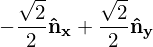

In [10]:
u = cos(theta)*N.x + sin(theta)*N.y
u

In [16]:
gradf = gradient(f.subs({x:N[0],y:N[1]}),N)
gradf

In [22]:
gradf_ab = gradf.subs({N[0]:P[0], N[1]:P[1]})
gradf_ab

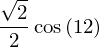

In [23]:
Duf_ab = gradf_ab.dot(u)
Duf_ab

### Alternate solution to problem 7

Since $D_{\hat u}f(x,y) = \nabla f(x,y)\cdot\hat{u}$ and $\bf{a}\cdot \bf{b} = |\bf{a}| |\bf{b}| \cos\alpha$, where $\alpha$ is the angle between $\bf{a}$ and $\bf{b}$, you might try calculating the directional derivative as

$$D_{\hat u}f(x,y) = |\nabla f(x,y)| |\hat{u}| \cos(\alpha)
= |\nabla f(x,y)| \cos(\alpha)$$

where $\alpha$ is the angle between $\hat{u}$ and $\nabla f(x,y)$. In this problem we are told that the direction is given by the angle $\theta = 3\pi/4$. From the calculations in the previous solution, we have $\nabla f(-2,-5) = \langle \cos(12), 2\cos(12) \rangle$. 

Hence $|\nabla f(-2,-5)| = \sqrt{\cos^2(12) + 4\cos^2(12)} =
\sqrt{5\cos^2(12)} = \sqrt{5} \cos(12)$

The angle $\beta$ this vector makes with the positive $x$ direction is given by $\tan\beta = \frac{2\cos(12)}{\cos(12)} = 2$, hence $\beta = \arctan(2)$

The angle $\alpha$ is the difference between these two angles; $\alpha = \theta - \beta = 3\pi/4 - \arctan(2)$.

We finally get

\begin{align*}
    D_{\hat u}f(x,y) &= |\nabla f(x,y)| \cos(\alpha)\\
    &= \sqrt{5}\cos(12) \cos(3\pi/4 - \arctan(2))
\end{align*}

We check this calculation below.

In [39]:
gradf_ab_norm = gradf_ab.magnitude()
gradf_ab_norm

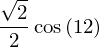

In [38]:
simplify(gradf_ab_norm * cos(3*pi/4 - atan(2)))

So we see that the two methods provide the same solution but I think you will agree that the first method is both technically and conceptually easier.